In [2]:
import pandas as pd

In [3]:
crime_loc_raw = pd.read_csv(
    '../data2/02. crime_in_Seoul_location.csv', thousands=',', encoding='euc-kr')
crime_loc_raw.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [4]:
crime_loc_raw['범죄명'].unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [5]:
crime_loc_raw['장소'].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [7]:
import numpy as np

In [10]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw, index=['장소'], columns=['범죄명'], aggfunc=[np.sum]
)
crime_loc.columns = crime_loc.columns.droplevel([0, 1])
crime_loc.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579


In [11]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_loc_norm = crime_loc / crime_loc.max()
crime_loc_norm.head()       # 각 컬럼의 MAX값으로 나눈 값을 정규화 함.

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [12]:
crime_loc_norm['종합'] = np.mean(crime_loc_norm, axis=1)
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [18]:
crime_loc_norm_sort = crime_loc_norm.sort_values(by='종합', ascending=False)

def drawGraph():
    plt.figure(figsize=(10, 10))
    sns.heatmap(crime_loc_norm_sort, annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
    plt.title('범죄와 발생 장소')
    plt.show()

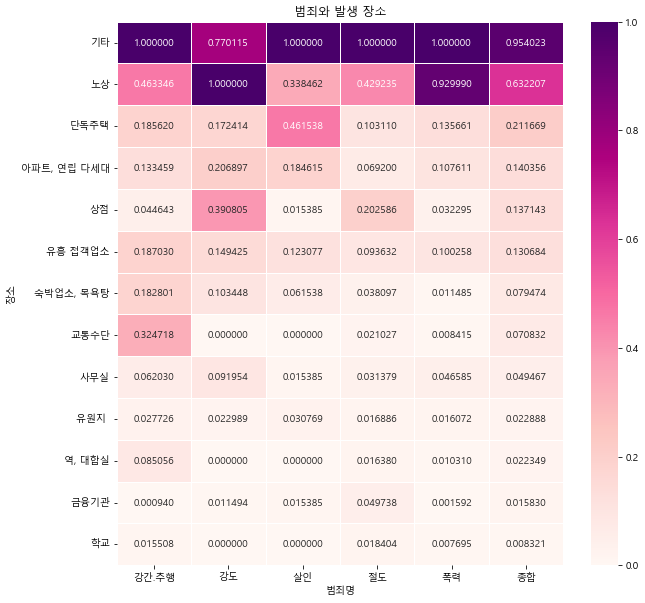

In [19]:
drawGraph()